# Projeto Final de Machine Learning

<strong>Membros:</strong>
- João Laet
- Nicolas Cho
- Roger Pina

<strong>Professor:</strong>
- Fábio Ayres

<strong>Github:</strong>
- https://github.com/NicolasCho/projeto_ML

<strong>Dataset:</strong>
- https://www.kaggle.com/competitions/mens-machine-learning-competition-2018/data

## Sumário

* [1 - Introdução](#1)
* [2 - Imports](#2)
* [3 - Data Exploration](#3)
* [4 - Feature Engineering](#4)
* [5 - Data Visualization](#5)
* [6 - Models](#6)
* [7 - Resultados](#7)
* [8 - Conclusão](#8)

<a name="1"></a>
## 1 - Introdução

Projeto tem como objetivo o desenvolvimento de um modelo preditivo para prever o resultado de jogos da NCAA, liga universitária americana de basquete. 

---

<a name="2"></a>
## 2 - Imports

In [1]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import os
from sklearn.metrics import (mean_squared_error,
                             confusion_matrix,  # ConfusionMatrixDisplay,
                             roc_curve, roc_auc_score)
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from plotnine import *
#from keras import tensorflow

---

<a name="3"></a>
## 3 - Data Exploration

Das tabelas disponíveis, foram selecionadas as que contém informações dos ID's e nomes de todos os times participantes além das que possuem os detalhes dos jogos que já ocorreram desde 1985.

### Data Section 1 - The basics

In [2]:
os.chdir("data/NCAA/")

In [3]:
df_teams = pd.read_csv("Teams.csv")
seasons = pd.read_csv("Seasons.csv")
NCAATourneySeeds = pd.read_csv("NCAATourneySeeds.csv")
RegularSeasonCompactResults = pd.read_csv("RegularSeasonCompactResults.csv")
NCAATourneyCompactResults = pd.read_csv("NCAATourneyCompactResults.csv")
SampleSubmissionStage1 = pd.read_csv("SampleSubmissionStage1.csv")

### Teams

In [4]:
df_teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018
...,...,...,...,...
359,1460,Wright St,1988,2018
360,1461,Wyoming,1985,2018
361,1462,Xavier,1985,2018
362,1463,Yale,1985,2018


### Seasons

In [5]:
seasons

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West
3,1988,11/2/1987,East,Midwest,Southeast,West
4,1989,10/31/1988,East,West,Midwest,Southeast
5,1990,10/30/1989,East,Midwest,Southeast,West
6,1991,10/29/1990,East,Southeast,Midwest,West
7,1992,11/4/1991,East,West,Midwest,Southeast
8,1993,11/2/1992,East,Midwest,Southeast,West
9,1994,11/1/1993,East,Southeast,Midwest,West


### Seeds

In [6]:
NCAATourneySeeds

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2145,2017,Z12,1292
2146,2017,Z13,1457
2147,2017,Z14,1245
2148,2017,Z15,1297


In [7]:
NCAATourneySeeds = NCAATourneySeeds[NCAATourneySeeds['Season'] < 2014]

### RegularSeasonCompactResults

In [8]:
RegularSeasonCompactResults

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
150679,2017,132,1276,71,1458,56,N,0
150680,2017,132,1343,71,1463,59,N,0
150681,2017,132,1348,70,1433,63,N,0
150682,2017,132,1374,71,1153,56,N,0


In [9]:
RegularSeasonCompactResults = RegularSeasonCompactResults[RegularSeasonCompactResults['Season'] < 2014]

### NCAATourneyCompactResults

In [10]:
NCAATourneyCompactResults 

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2112,2017,146,1314,75,1246,73,N,0
2113,2017,146,1376,77,1196,70,N,0
2114,2017,152,1211,77,1376,73,N,0
2115,2017,152,1314,77,1332,76,N,0


In [11]:
NCAATourneyCompactResults = NCAATourneyCompactResults[NCAATourneyCompactResults['Season'] < 2014]

Existem duas tabelas com os jogos, sendo elas:

<strong>1 - RegularSeason</strong>
Campeonato antes da NCAA - 150K linhas de jogos (1985 - 2017)

<strong>2 - NCAA Tourney</strong>
2K linhas de jogos (1985 - 2017)

### SampleSubmissionStage1

In [12]:
SampleSubmissionStage1

,ID,Pred
0,2014_1107_1110,0.5
1,2014_1107_1112,0.5
2,2014_1107_1113,0.5
3,2014_1107_1124,0.5
4,2014_1107_1140,0.5
...,...,...
9107,2017_1455_1458,0.5
9108,2017_1455_1462,0.5
9109,2017_1457_1458,0.5
9110,2017_1457_1462,0.5


In [13]:
#pbp2010 = pd.read_csv('./mens-machine-learning-competition-2018/PlayByPlay_2010/Events_2010.csv')

---

<a name="4"></a>
## 4 - Feature Engineering

Antes de iniciar modelos, devemos preparar os dados e extrair as informações importantes que serão usadas. Será utilizado o histórico de jogo completo, desde 1985 até 2013.

### Elo Rating

O elo é um sistema criado para medir a "força" de um time. Para tanto, atribui-se um score para cada time que aumenta ou diminui conforme ele ganha e perde partidas, respectivamente. O cálculo do elo foi baseado no seguinte artigo:

https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/#:~:text=Here's%20the%20formula%3A%20Take%20the,and%20then%20divide%20by%2028

In [14]:
# Calcula as probabilidades de cada time ganhar em uma partida
def win_probs(wTeam_elo, lTeam_elo, home_court_advantage, WLoc):
    w = math.pow(10, wTeam_elo/400)
    l = math.pow(10, lTeam_elo/400)
    a = math.pow(10, home_court_advantage/400) 
    
    if WLoc == 'H':
        denom = l + a*w
        wTeam_prob = a*w / denom
        lTeam_prob = l / denom   
        
    elif WLoc == 'A':
        denom = a*l + w
        wTeam_prob = w / denom
        lTeam_prob = a*l / denom   
        
    else:
        denom = l + w
        wTeam_prob = a / denom
        lTeam_prob = l / denom 
        
    return wTeam_prob, lTeam_prob

In [15]:
# Determina o quão forte será a mudança de elo dado resultado de uma partida
def elo_k(MOV, elo_diff):
    k = 20
    if MOV>0:
        multiplier=(MOV+3)**(0.8)/(7.5+0.006*(elo_diff))
    else:
        multiplier=(-MOV+3)**(0.8)/(7.5+0.006*(-elo_diff))
    return k*multiplier

In [16]:
# Atualiza o elo de cada time conforme o resultado de uma partida
def update_elo(game, df_eloActual):
    home_court_advantage = 100
    wTeam = game['WTeamID']
    wTeam_elo = int(df_eloActual[df_eloActual['TeamID'] == wTeam][str(game['Season'])])
    wTeam_score = game['WScore']
    #print(wTeam, wTeam_elo, wTeam_score)
    
    lTeam = game['LTeamID']
    lTeam_elo = int(df_eloActual[df_eloActual['TeamID'] == lTeam][str(game['Season'])])
    lTeam_score = game['LScore']
    #print(lTeam, lTeam_elo, lTeam_score)
        
    wTeam_prob, lTeam_prob = win_probs(wTeam_elo, lTeam_elo, home_court_advantage, game['WLoc'])
    
    k = elo_k(wTeam_score - lTeam_score, wTeam_elo - lTeam_elo)
        
    updated_wTeam_elo = wTeam_elo + k * (1 - wTeam_prob) 
    updated_lTeam_elo = lTeam_elo + k * (0 - lTeam_prob)
    
    return updated_wTeam_elo, updated_lTeam_elo

In [17]:
# 1
df_RegularSeason = RegularSeasonCompactResults.copy() # Dataframe que será adicinado o elo rating

# 2 
df_NCAATourney = NCAATourneyCompactResults.copy() # Dataframe que será adicinado o elo rating

In [18]:
df_elo = df_teams.copy().drop(columns=['TeamName', 'FirstD1Season', 'LastD1Season'])

for season in df_NCAATourney['Season'].unique():

  if season == 1985:
    df_elo[str(season)] = 1500
  else:
    df_elo[str(season)] = list(df_elo[str(season - 1)])

  #1 - Calcular o Elo Rating na Regular Season
  for index, row in df_RegularSeason[df_RegularSeason['Season'] == season].iterrows():
    updated_wTeam_elo, updated_lTeam_elo = update_elo(row, df_elo)

    #wTeam
    idx = df_elo[df_elo['TeamID'] == row['WTeamID']].index[0]
    df_elo.loc[idx, str(season)] = updated_wTeam_elo
    df_RegularSeason.loc[index, 'WElo'] = updated_wTeam_elo
    
    #lTeam
    idx = df_elo[df_elo['TeamID'] == row['LTeamID']].index[0]
    df_elo.loc[idx, str(season)] = updated_lTeam_elo
    df_RegularSeason.loc[index, 'LElo'] = updated_lTeam_elo 

  #2 - Calcular o Elo Rating no NCAA
  for index, row in df_NCAATourney[df_NCAATourney['Season'] == season].iterrows():
    updated_wTeam_elo, updated_lTeam_elo = update_elo(row, df_elo)

    #wTeam
    idx = df_elo[df_elo['TeamID'] == row['WTeamID']].index[0]
    df_elo.loc[idx, str(season)] = updated_wTeam_elo
    df_NCAATourney.loc[index, 'WElo'] = updated_wTeam_elo
    
    #lTeam
    idx = df_elo[df_elo['TeamID'] == row['LTeamID']].index[0]
    df_elo.loc[idx, str(season)] = updated_lTeam_elo
    df_NCAATourney.loc[index, 'LElo'] = updated_lTeam_elo 

### Tabela final para modelo

Tendo o histórico de partidas e os elos associados aos times para cada determinado momento, é possível reduzir os dados a serem utilizados em uma tabela final.

In [19]:
df_RegularSeason['Tourney'] = 'RS'
df_NCAATourney['Tourney'] = 'NCAA'

In [20]:
AllGames = pd.concat([df_RegularSeason ,df_NCAATourney])
AllGames['TeamA'] = AllGames[["WTeamID", "LTeamID"]].min(axis=1)
AllGames['TeamB'] = AllGames[["WTeamID", "LTeamID"]].max(axis=1)
AllGames['Mandante'] = np.where(AllGames['WLoc'] == "H", AllGames['WTeamID'],
                           np.where(AllGames['WLoc'] == "A", AllGames['LTeamID'], "0"))
AllGames['TeamAWins'] = np.where(AllGames['WTeamID'] == AllGames['TeamA'], True, False)
AllGames['EloA'] = np.where(AllGames['TeamA'] == AllGames['WTeamID'], AllGames['WElo'], AllGames['LElo'])
AllGames['EloB'] = np.where(AllGames['TeamB'] == AllGames['LTeamID'], AllGames['LElo'], AllGames['WElo'])
AllGames

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WElo,LElo,Tourney,TeamA,TeamB,Mandante,TeamAWins,EloA,EloB
0,1985,20,1228,81,1328,64,N,0,1529.290316,1485.352526,RS,1228,1328,0,True,1529.290316,1485.352526
1,1985,25,1106,77,1354,70,H,0,1506.056097,1493.943903,RS,1106,1354,1106,True,1506.056097,1493.943903
2,1985,25,1112,63,1223,56,H,0,1506.056097,1493.943903,RS,1112,1223,1112,True,1506.056097,1493.943903
3,1985,25,1165,70,1432,54,H,0,1510.120354,1489.879646,RS,1165,1432,1165,True,1510.120354,1489.879646
4,1985,25,1192,86,1447,74,H,0,1508.376562,1491.623438,RS,1192,1447,1192,True,1508.376562,1491.623438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2013,146,1257,85,1181,63,N,0,2558.189264,2511.101542,NCAA,1181,1257,0,False,2511.101542,2558.189264
1845,2013,146,1276,79,1196,59,N,0,2324.451300,2442.406261,NCAA,1196,1276,0,False,2442.406261,2324.451300
1846,2013,152,1257,72,1455,68,N,0,2567.490343,2141.206810,NCAA,1257,1455,0,True,2567.490343,2141.206810
1847,2013,152,1276,61,1393,56,N,0,2339.680413,2441.395301,NCAA,1276,1393,0,True,2339.680413,2441.395301


In [21]:
#Cria csv ta tabela acima
AllGames.to_csv("games_with_elo.csv", index = False)

In [22]:
AllGames = pd.read_csv("games_with_elo.csv")

In [23]:
#AllGames

In [24]:
df = pd.DataFrame()
df['Season'] = AllGames['Season']
df['TeamA'] = AllGames['TeamA']
df['TeamB'] = AllGames['TeamB']
df['Mandante'] = AllGames['Mandante']
df['EloA'] = AllGames['EloA']
df['EloB'] = AllGames['EloB']
df['TeamAWins'] = AllGames['TeamAWins']
df

,Season,TeamA,TeamB,Mandante,EloA,EloB,TeamAWins
0,1985,1228,1328,0,1529.290316,1485.352526,True
1,1985,1106,1354,1106,1506.056097,1493.943903,True
2,1985,1112,1223,1112,1506.056097,1493.943903,True
3,1985,1165,1432,1165,1510.120354,1489.879646,True
4,1985,1192,1447,1192,1508.376562,1491.623438,True
...,...,...,...,...,...,...,...
131048,2013,1181,1257,0,2511.101542,2558.189264,False
131049,2013,1196,1276,0,2442.406261,2324.451300,False
131050,2013,1257,1455,0,2567.490343,2141.206810,True
131051,2013,1276,1393,0,2339.680413,2441.395301,True


Nesta tabela são encontradas as principais informações dos jogos junto à variável TeamAWins, sendo esta a que desejamos prever.

---

<a name="5"></a>
## 5 - Data Visualization

Para uma análise visual mais direta e inicial dos dados obtidos, será calculada a probabilidade de vitória de um time sobre outro time baseada no histórico de partidas que esses dois times já disputaram juntos. A exemplo, se um time X ganha muito de um time Y, então a probabilidade do time X ganhar de Y em jogos futuros é maior.

In [25]:
from matplotlib import pyplot as plt

In [26]:
visualizacao = df.loc[df['TeamAWins'] == True].groupby(['TeamA','TeamB'])['TeamAWins'].count() / df.groupby(['TeamA','TeamB'])['TeamAWins'].count()
visualizacao = visualizacao.reset_index()
visualizacao = visualizacao.fillna(0)
visualizacao

,TeamA,TeamB,TeamAWins
0,1102,1108,1.000000
1,1102,1109,0.833333
2,1102,1115,1.000000
3,1102,1117,1.000000
4,1102,1119,0.750000
...,...,...,...
22616,1458,1462,0.333333
22617,1459,1462,0.500000
22618,1460,1462,0.400000
22619,1460,1464,0.825000


Da tabela acima, temos a probabilidade do time A ganhar do time B.

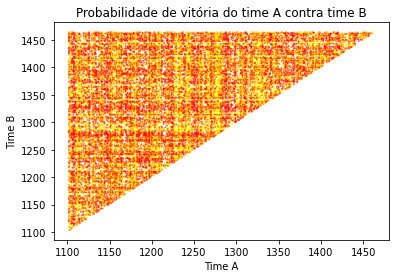

In [27]:
plt.scatter(visualizacao["TeamA"], visualizacao["TeamB"], c= visualizacao["TeamAWins"], cmap=plt.cm.autumn, alpha=0.5, s = 1)
plt.title("Probabilidade de vitória do time A contra time B")
plt.xlabel("Time A")
plt.ylabel("Time B")
plt.show()

Já o gráfico acima mostra as probabilidades dos times em A (eixo x), ganharem dos times em B (eixo y). Cores mais fortes significam maiores
probabilidades de vitórias e cores mais fracas significam menores probabilidades.

Removendo pontos "seguros" (com taxa de vitória ou derrota altas)

In [28]:
visualizacao_incertos = visualizacao.loc[(visualizacao.TeamAWins > 0.4) & (visualizacao.TeamAWins < 0.6)]
visualizacao_incertos

,TeamA,TeamB,TeamAWins
7,1102,1125,0.500000
12,1102,1142,0.500000
13,1102,1143,0.500000
14,1102,1148,0.500000
17,1102,1154,0.500000
...,...,...,...
22596,1453,1460,0.500000
22601,1454,1460,0.522727
22607,1455,1462,0.500000
22609,1456,1459,0.500000


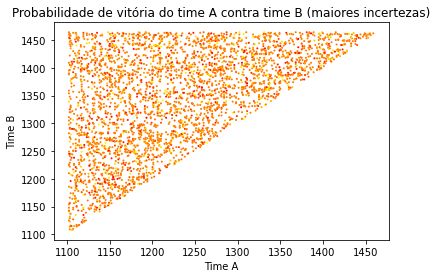

In [29]:
plt.scatter(visualizacao_incertos["TeamA"], visualizacao_incertos["TeamB"], c= visualizacao_incertos["TeamAWins"], cmap=plt.cm.autumn, alpha=1, s = 1)
plt.title("Probabilidade de vitória do time A contra time B (maiores incertezas)")
plt.xlabel("Time A")
plt.ylabel("Time B")
plt.show()

O gráfico acima mostra apenas os pontos em que há grande incerteza de resultado (probabilidade de vitória entre 40% e 60%). É possível observar que utilizando o método descrito para o cálculo das probabilidades, há muitos pontos incertos no gráfico. 

---

<a name="6"></a>
## 6 - Models

### Previsão utilizando matriz de transição

A primeira ideia desenvolvida seria utilizando justamente as probabilidades obtidas na seção anterior e criar uma matriz de transição entre os times presentes.

No caso, surgiria um problema: nem todos os jogos possíveis entre todos os times já ocorreram na base de dados. Logo, nosso modelo não possuíria informação para alguns confrontos e, portanto, não seria capaz de estimar o resultado.

Como solução, sería possível criar uma rede de todos os times em que as arestas seriam as probabilidades de um time ganhar de outro (sempre do menor ID para o maior). Assim, caso não exista histórico entre dois times, é possível calcular a probabilidade utilizando um caminho na rede.

#### Criando a rede

In [30]:
import networkx as nx

G = nx.from_pandas_edgelist(visualizacao, source='TeamA', target='TeamB',
                            edge_attr='TeamAWins') 

In [31]:
visualizacao_copy = visualizacao.copy()
teams = pd.unique(visualizacao_copy[['TeamA', 'TeamB']].values.ravel('K'))
n = len(teams)
n

360

In [32]:
len(df_teams)

364

4 times não apareceram em nenhuma partida até 2014

#### Matriz de transição

In [33]:
matrix = np.zeros((n,n))

In [34]:
trans_matrix = pd.DataFrame(matrix, columns = teams, index=teams)

In [35]:
trans_matrix

,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,...,1455,1456,1457,1458,1459,1460,1462,1461,1463,1464
1102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No caso, será utilizado o menor caminho na rede, entre dois times, para calcular a probabilidade.

In [36]:
#Todos os caminhos minimos possiveis entre possibilidades de jogos
erros = 0
i = 0
for team in teams[:]:
    for opponent in teams[i+1:]:
        try:
            probability = 1
            path = nx.shortest_path(G, source=team, target=opponent)
            for source, target in zip(path, path[1:]):
                prob = G[source][target]["TeamAWins"]
                if source < target:
                    probability *= prob
                else:
                    probability *= (1 - prob)
            trans_matrix.loc[trans_matrix.index == path[0], path[-1]] = prob
        except:
            erros += 1 
    i += 1
print(erros)

0


In [37]:
trans_matrix

,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,...,1455,1456,1457,1458,1459,1460,1462,1461,1463,1464
1102,0.0,0.5,1.0,0.586207,0.553846,1.000000,1.000000,0.833333,0.827586,0.5,...,0.00,0.00000,0.0,0.0,0.666667,0.50,0.00,0.301587,1.0,0.500000
1103,0.0,0.0,0.0,1.000000,1.000000,0.480000,0.111111,0.500000,1.000000,1.0,...,0.75,0.00000,0.5,0.5,1.000000,0.75,0.00,0.500000,1.0,0.814815
1104,0.0,0.0,0.0,1.000000,1.000000,0.307692,0.586207,0.500000,1.000000,1.0,...,0.75,0.00000,1.0,0.5,1.000000,0.75,0.75,0.500000,1.0,1.000000
1105,0.0,0.0,0.0,0.000000,0.264706,1.000000,0.586207,0.000000,1.000000,1.0,...,0.00,1.00000,1.0,0.5,1.000000,0.00,0.75,0.000000,1.0,1.000000
1106,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.553846,0.000000,1.000000,1.0,...,0.75,0.74359,1.0,0.5,1.000000,0.00,0.75,0.000000,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00000,0.0,0.0,0.000000,0.00,0.40,0.301587,1.0,0.825000
1462,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00000,0.0,0.0,0.000000,0.00,0.00,0.301587,1.0,1.000000
1461,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00000,0.0,0.0,0.000000,0.00,0.00,0.000000,1.0,0.500000
1463,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.00,0.00000,0.0,0.0,0.000000,0.00,0.00,0.000000,0.0,0.500000


A visualização da rede pode ser feita rodando a célula abaixo (alterando os valores dos argumentos para melhor visualização)

In [38]:
# widths = np.array([w for *_, w in G.edges.data('TeamAWins')])

# pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibi

# # nodes
# nx.draw_networkx_nodes(G, pos)

# # edges
# nx.draw_networkx_edges(G, pos, width=widths)  

# # labels
# nx.draw_networkx_labels(G, pos, font_family="sans-serif")

# ax = plt.gca()
# ax.margins(0.08)
# plt.axis("off")
# plt.tight_layout()

### Previsão utilizando outros modelos e elo rating

Além do modelo utilizando matriz de transição, podemos utilizar de modelos mais clássicos de Machine Learning e da variável de Elo Rating calculada nas sessões anteriores.

Será necessário separar entre dados de treino e teste

In [39]:
df1 = df.drop(columns=['Mandante', "Season"])
df1[['TeamA','TeamB']] = df[['TeamA','TeamB']].astype(str)

In [40]:
from sklearn.linear_model import LogisticRegression
RANDOM_SEED = 42
train_set, test_set = train_test_split(
    df1,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

X_train = train_set.drop(columns=['TeamAWins'])
y_train = train_set['TeamAWins']

X_test = test_set.drop(columns=['TeamAWins'])
y_test = test_set['TeamAWins']

#### Logistic regression

Como queremos classificar se o time A ganha do time B, é possíve utilizar um modelo de regressão logística (classificação) para prever os resultados.

In [41]:
rl = LogisticRegression()
rl.fit(X_train, y_train)
y_pred_rl = rl.predict(X_test)

In [42]:
CM_RL = confusion_matrix(y_test, y_pred_rl)
print(CM_RL, "\n")

accuracy = (CM_RL[0, 0] + CM_RL[1, 1]) / CM_RL.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = CM_RL[1, 1] / (CM_RL[1, 0] + CM_RL[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = CM_RL[0, 1] / (CM_RL[0, 0] + CM_RL[0, 1])
print(f"Specificity: {specificity:.4f}")

[[9804 3538]
 [3517 9352]] 

Accuracy:    0.7308
Sensitivity: 0.7267
Specificity: 0.2652


#### Random Forest

Outro modelo que pode ser utilizado é o de Random Forest.

In [43]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [44]:
CM_RF = confusion_matrix(y_test, y_pred_rf)
print(CM_RF, "\n")

accuracy = (CM_RF[0, 0] + CM_RF[1, 1]) / CM_RF.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = CM_RF[1, 1] / (CM_RF[1, 0] + CM_RF[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = CM_RF[0, 1] / (CM_RF[0, 0] + CM_RF[0, 1])
print(f"Specificity: {specificity:.4f}")

[[9496 3846]
 [3932 8937]] 

Accuracy:    0.7033
Sensitivity: 0.6945
Specificity: 0.2883


#### Decision Tree

Por fim, árvores de decisão também podem ser utilizadas em problemas de classificação.

In [45]:
dt = tree.DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [46]:
CM_DT = confusion_matrix(y_test, y_pred_dt)
print(CM_DT, "\n")

accuracy = (CM_DT[0, 0] + CM_DT[1, 1]) / CM_DT.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = CM_DT[1, 1] / (CM_DT[1, 0] + CM_DT[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = CM_DT[0, 1] / (CM_DT[0, 0] + CM_DT[0, 1])
print(f"Specificity: {specificity:.4f}")

[[8444 4898]
 [4682 8187]] 

Accuracy:    0.6345
Sensitivity: 0.6362
Specificity: 0.3671


### Modelos utilizando dados de mandante

Os modelos acima utilizaram apenas da variável de elo rating para determinar a probabilidade de vitória. Pelos dados fornecidos, também é possível utilizar do fato do time estar jogando em casa ou não para auxiliar na previsão do modelo. A variável está na coluna de "Mandante".

In [47]:
df2 = df.drop(columns=["Season"])
df2[['TeamA','TeamB',"Mandante"]] = df[['TeamA','TeamB',"Mandante"]].astype(str)
df2

,TeamA,TeamB,Mandante,EloA,EloB,TeamAWins
0,1228,1328,0,1529.290316,1485.352526,True
1,1106,1354,1106,1506.056097,1493.943903,True
2,1112,1223,1112,1506.056097,1493.943903,True
3,1165,1432,1165,1510.120354,1489.879646,True
4,1192,1447,1192,1508.376562,1491.623438,True
...,...,...,...,...,...,...
131048,1181,1257,0,2511.101542,2558.189264,False
131049,1196,1276,0,2442.406261,2324.451300,False
131050,1257,1455,0,2567.490343,2141.206810,True
131051,1276,1393,0,2339.680413,2441.395301,True


In [48]:
train_setM, test_setM = train_test_split(
    df2,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

X_trainM = train_setM.drop(columns=['TeamAWins'])
y_trainM = train_setM['TeamAWins']

X_testM = test_setM.drop(columns=['TeamAWins'])
y_testM = test_setM['TeamAWins']

In [49]:
X_trainM

,TeamA,TeamB,Mandante,EloA,EloB
109484,1106,1356,1356,1433.224714,1781.775286
95416,1423,1433,1433,1704.184259,1792.815741
32549,1123,1265,0,1701.106973,1329.621903
79935,1219,1299,1219,1236.667805,1048.332195
56703,1166,1234,1234,1647.574936,2026.425064
...,...,...,...,...,...
128106,1162,1463,1463,1450.002958,1429.997042
103694,1410,1442,0,1354.118141,1263.572793
860,1308,1332,1308,1466.973694,1486.026306
15795,1429,1451,1429,1624.444550,1372.555450


#### Regressão Logística

In [50]:
rlM = LogisticRegression()
rlM.fit(X_trainM, y_trainM)
y_pred_rlM = rlM.predict(X_testM)

CM_RLM = confusion_matrix(y_testM, y_pred_rlM)
print(CM_RLM, "\n")

accuracy = (CM_RLM[0, 0] + CM_RLM[1, 1]) / CM_RLM.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = CM_RLM[1, 1] / (CM_RLM[1, 0] + CM_RLM[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = CM_RLM[0, 1] / (CM_RLM[0, 0] + CM_RLM[0, 1])
print(f"Specificity: {specificity:.4f}")

[[9805 3537]
 [3510 9359]] 

Accuracy:    0.7311
Sensitivity: 0.7273
Specificity: 0.2651


#### Random Forest

In [51]:
rfM = RandomForestClassifier(random_state = 42)
rfM.fit(X_trainM, y_trainM)
y_pred_rfM = rfM.predict(X_testM)

CM_RFM = confusion_matrix(y_testM, y_pred_rfM)
print(CM_RFM, "\n")

accuracy = (CM_RFM[0, 0] + CM_RFM[1, 1]) / CM_RFM.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = CM_RFM[1, 1] / (CM_RFM[1, 0] + CM_RFM[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = CM_RFM[0, 1] / (CM_RFM[0, 0] + CM_RFM[0, 1])
print(f"Specificity: {specificity:.4f}")

[[9841 3501]
 [3529 9340]] 

Accuracy:    0.7318
Sensitivity: 0.7258
Specificity: 0.2624


#### Decision Tree

In [52]:
dtM = tree.DecisionTreeClassifier(random_state = 42)
dtM.fit(X_trainM, y_trainM)
y_pred_dtM = dtM.predict(X_testM)

CM_DTM = confusion_matrix(y_testM, y_pred_dtM)
print(CM_DTM, "\n")

accuracy = (CM_DTM[0, 0] + CM_DTM[1, 1]) / CM_DTM.sum()
print(f"Accuracy:    {accuracy:.4f}")

sensitivity = CM_DTM[1, 1] / (CM_DTM[1, 0] + CM_DTM[1, 1])
print(f"Sensitivity: {sensitivity:.4f}")

specificity = CM_DTM[0, 1] / (CM_DTM[0, 0] + CM_DTM[0, 1])
print(f"Specificity: {specificity:.4f}")

[[8844 4498]
 [4447 8422]] 

Accuracy:    0.6587
Sensitivity: 0.6544
Specificity: 0.3371


---

<a name="7"></a>
## 7 - Resultados

### Modelos com elo rating

Utilizando a variável de elo rating e dado de mandante, obtemos a seguinte tabela com as performances de cada modelo

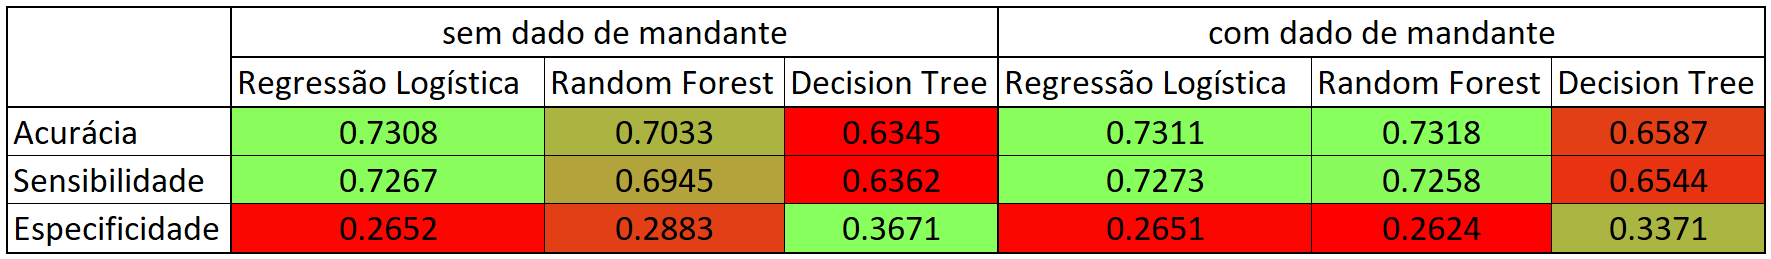

As curvas ROC para cada modelo da tabela acima também podem ser obtidas:

In [53]:
y_pred_prob_rl = rl.predict_proba(X_test)
y_pred_prob_rl = y_pred_prob_rl[:, 1]

y_pred_prob_rf = rf.predict_proba(X_test)
y_pred_prob_rf = y_pred_prob_rf[:, 1]

y_pred_prob_dt = dt.predict_proba(X_test)
y_pred_prob_dt = y_pred_prob_dt[:, 1]


y_pred_prob_rlM = rlM.predict_proba(X_testM)
y_pred_prob_rlM = y_pred_prob_rlM[:, 1]

y_pred_prob_rfM = rfM.predict_proba(X_testM)
y_pred_prob_rfM = y_pred_prob_rfM[:, 1]

y_pred_prob_dtM = dtM.predict_proba(X_testM)
y_pred_prob_dtM = y_pred_prob_dtM[:, 1]

In [54]:
fpr_rl, tpr_rl, thresholds_rl = roc_curve(y_test, y_pred_prob_rl)
print(f"AUC score regressão logística:    {roc_auc_score(y_test, y_pred_prob_rl):.4f}")

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
print(f"AUC score random forest:    {roc_auc_score(y_test, y_pred_prob_rf):.4f}")

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
print(f"AUC score decision tree:    {roc_auc_score(y_test, y_pred_prob_dt):.4f}")


fpr_rlM, tpr_rlM, thresholds_rlM = roc_curve(y_testM, y_pred_prob_rlM)
print(f"AUC score regressão logística com mandante:    {roc_auc_score(y_testM, y_pred_prob_rlM):.4f}")

fpr_rfM, tpr_rfM, thresholds_rfM = roc_curve(y_testM, y_pred_prob_rfM)
print(f"AUC score random forest com mandante:    {roc_auc_score(y_testM, y_pred_prob_rfM):.4f}")

fpr_dtM, tpr_dtM, thresholds_dtM = roc_curve(y_testM, y_pred_prob_dtM)
print(f"AUC score decision tree com mandante:    {roc_auc_score(y_testM, y_pred_prob_dtM):.4f}")

AUC score regressão logística:    0.8062
AUC score random forest:    0.7779
AUC score decision tree:    0.6345
AUC score regressão logística com mandante:    0.8069
AUC score random forest com mandante:    0.8119
AUC score decision tree com mandante:    0.6587


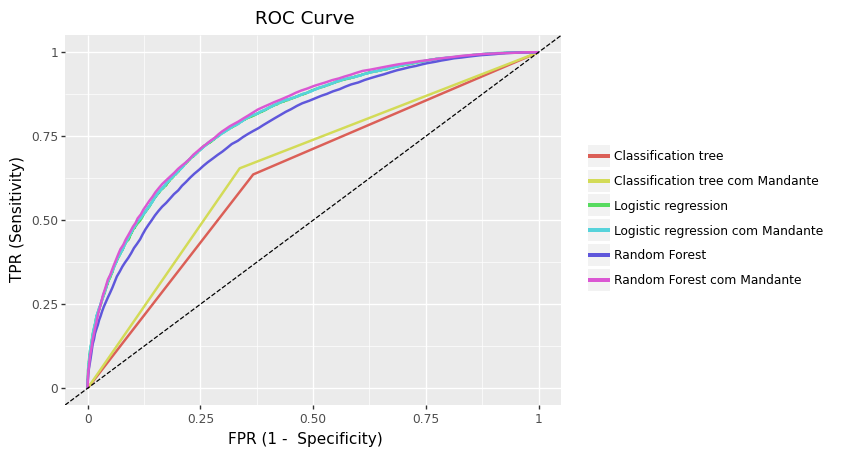

<ggplot: (87241597215)>

In [55]:
(pd.concat([pd.DataFrame(dict(fpr = fpr_rl, tpr = tpr_rl, model = "Logistic regression")),
            pd.DataFrame(dict(fpr = fpr_dt, tpr = tpr_dt, model = "Classification tree")), 
            pd.DataFrame(dict(fpr = fpr_rf,   tpr = tpr_rf,   model = "Random Forest")),
            pd.DataFrame(dict(fpr = fpr_rlM, tpr = tpr_rlM, model = "Logistic regression com Mandante")),
            pd.DataFrame(dict(fpr = fpr_dtM, tpr = tpr_dtM, model = "Classification tree com Mandante")),
            pd.DataFrame(dict(fpr = fpr_rfM,   tpr = tpr_rfM,   model = "Random Forest com Mandante"))])
   .pipe(lambda _: ggplot(_, aes(x = "fpr", y = "tpr", color = "model")) +
                       geom_line(size = 1) + 
                       geom_abline(linetype = "dashed") +
                       labs(x = "FPR (1 -  Specificity)", y = "TPR (Sensitivity)",
                            title = "ROC Curve") +
                       theme(legend_title = element_blank())))

---

### Utilizando a matriz de transição

Para medir o desempenho utilizando a matriz de transição será necessário utilizar novos dados que não foram utilizados para o "treinamento" (cálculo das probabilidades) do modelo.

Serão utilizados os jogos de 2014 para teste da matriz de transição

In [56]:
RegularSeasonCompactResults = pd.read_csv("RegularSeasonCompactResults.csv")

In [57]:
RegularSeasonCompactResults_2014 = RegularSeasonCompactResults[RegularSeasonCompactResults['Season'] == 2014]
RegularSeasonCompactResults_2014

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
129204,2014,4,1102,79,1119,68,N,0
129205,2014,4,1103,72,1157,63,H,0
129206,2014,4,1107,74,1373,62,A,0
129207,2014,4,1112,73,1142,62,H,0
129208,2014,4,1113,96,1420,61,H,0
...,...,...,...,...,...,...,...,...
134561,2014,132,1196,61,1246,60,N,0
134562,2014,132,1277,69,1276,55,N,0
134563,2014,132,1386,65,1433,61,N,0
134564,2014,132,1418,82,1209,81,N,1


In [58]:
RegularSeasonCompactResults_2014['TeamA'] = RegularSeasonCompactResults_2014[["WTeamID", "LTeamID"]].min(axis=1)
RegularSeasonCompactResults_2014['TeamB'] = RegularSeasonCompactResults_2014[["WTeamID", "LTeamID"]].max(axis=1)
RegularSeasonCompactResults_2014['TeamAWins'] = np.where(RegularSeasonCompactResults_2014['WTeamID'] == RegularSeasonCompactResults_2014['TeamA'], True, False)
RegularSeasonCompactResults_2014 = RegularSeasonCompactResults_2014.drop(columns=['DayNum', "Season", "WScore", "LTeamID", "LScore", "WLoc", "NumOT", "WTeamID"])
RegularSeasonCompactResults_2014['pred'] = False
RegularSeasonCompactResults_2014

C:\Users\jcesar\AppData\Local\Temp\ipykernel_11484\1001112494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcesar\AppData\Local\Temp\ipykernel_11484\1001112494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jcesar\AppData\Local\Temp\ipykernel_11484\1001112494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,TeamA,TeamB,TeamAWins,pred
129204,1102,1119,True,False
129205,1103,1157,True,False
129206,1107,1373,True,False
129207,1112,1142,True,False
129208,1113,1420,True,False
...,...,...,...,...
134561,1196,1246,True,False
134562,1276,1277,False,False
134563,1386,1433,True,False
134564,1209,1418,False,False


Acima temos a tabela coms os jogos de 2014 e as colunas **TeamAWins** (indica se o time A ganhou) e **pred** (previsão do modelo). **pred** é inicializada com False em todas as linhas

Utilizando a matriz para deteriminar as probabilidades:

In [59]:
for index, row in RegularSeasonCompactResults_2014.iterrows():
    try:
        val =  trans_matrix.loc[trans_matrix.index == int(row['TeamA']), int(row['TeamB'])].values[0] > 0.5
    except:
        val = False         
    RegularSeasonCompactResults_2014.loc[(RegularSeasonCompactResults_2014['TeamA'] == row['TeamA'])&(RegularSeasonCompactResults_2014['TeamB'] == RegularSeasonCompactResults_2014['TeamB']), 'pred'] = val

In [60]:
RegularSeasonCompactResults_2014

,TeamA,TeamB,TeamAWins,pred
129204,1102,1119,True,False
129205,1103,1157,True,True
129206,1107,1373,True,False
129207,1112,1142,True,True
129208,1113,1420,True,False
...,...,...,...,...
134561,1196,1246,True,False
134562,1276,1277,False,False
134563,1386,1433,True,False
134564,1209,1418,False,False


Desempenho da matriz:

In [61]:
acertos = 0
total = RegularSeasonCompactResults_2014.shape[0]
for index, row in RegularSeasonCompactResults_2014.iterrows():
    if row['TeamAWins'] == row['pred']:
        acertos += 1
acc = acertos / total
acc

0.54177545691906

---

<a name="8"></a>
## 8 - Conclusão

Para as previsões utilizando a matriz de transição, obtivemos um resultado ruim, com uma acurácia de aproximadamente 54%. Tal desempenho pode ter sido causado pelo fato de não possuirmos dados significativos o suficiente de todos os confrontos entre dois times. Ou seja, pelo fato de dois times possuírem poucos confrontos na base de dados, é difícil determinar a probabilidade de um time ganhar baseado nessa pouca quantidade de jogos jogados entre os dois. Além disso, a grande quantidade de incerteza, como visto nos gráficos de visualização, também podem contribuir para um desempenho ruim. Outro fator que contribui para o baixo desempenho é o uso de jogos que aconteceram há muitos anos atrás, sem ter neste meio tempo nenhuma atualização de se o time melhorou ou piorou.

Os modelos de machine learning rodaram com a utilização do Elo rating, valor que atualiza a partir de todos os jogos que a equipe jogou, tendo assim uma variável que mede a força atualizada do time. Com isso, foram criados três modelos: regressão logística, árvore de decisão e random forest. Estes três modelos foram aplicados para base de dados com e sem informação do time mandante, para analisar a influência deste parâmetro. Sem o dado de time mandante, a regressão logística obteve a melhor acurácia, já com o dado do time mandante, o random forest passou a ter a melhor acurácia. Olhando para a sensibilidade e especificidade, todos os modelos apresentaram uma sensibilidade muito superior a especificidade, mostrando que os modelos tendem a acertar mais valores quando o time A ganha do que quando o time A perde.

Para possível refinamento dos modelos, um ajuste de hiperparâmetros poderia ser uma alternativa, além da utilização de mais variáveis que englobem a composição dos times ou dados dos técnicos, de forma a melhorar a estimativa de força de cada equipe.